# Handwritten digit recognition

In [1]:
import numpy as np
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Reshape, Dropout
from tensorflow.keras.utils import plot_model

Load MNIST Dataset

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Normalize data images

In [3]:
x_train = (x_train/255.).astype(np.float32)
x_test  = (x_test/255.).astype(np.float32)

### Create Model

Create the convolutional base

In [4]:
model = Sequential([
    InputLayer(input_shape=(28, 28)),
    Reshape(target_shape=(28, 28, 1)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    
    Dense(512),
    Dense(64),
    Dense(10, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 256)         0

Compile and train the model

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
hist = model.fit(
    x_train,
    y_train,
    epochs = 5,
    batch_size = 512,
    validation_data=(x_test, y_test)
)

Epoch 1/5
118/118 [==============================] - 159s 1s/step - loss: 0.2366 - accuracy: 0.9281 - val_loss: 0.1128 - val_accuracy: 0.9627
Epoch 2/5
118/118 [==============================] - 158s 1s/step - loss: 0.0851 - accuracy: 0.9744 - val_loss: 0.0610 - val_accuracy: 0.9809
Epoch 3/5
118/118 [==============================] - 158s 1s/step - loss: 0.0590 - accuracy: 0.9816 - val_loss: 0.0727 - val_accuracy: 0.9781
Epoch 4/5
118/118 [==============================] - 158s 1s/step - loss: 0.0445 - accuracy: 0.9864 - val_loss: 0.0495 - val_accuracy: 0.9851
Epoch 5/5
118/118 [==============================] - 158s 1s/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0524 - val_accuracy: 0.9848


### Visualise Training Process

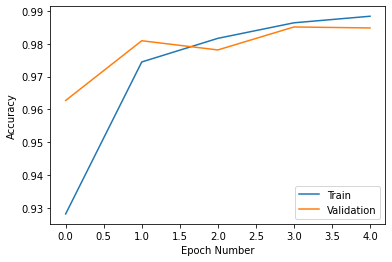

In [9]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(('Train','Validation'), loc='lower right')

### Evaluate Model

In [10]:
out = model.evaluate(x_test, y_test)
print ("Accuracy: {:0.2f}%".format(out[1]*100))

313/313 [==============================] - 7s 21ms/step - loss: 0.0524 - accuracy: 0.9848
Accuracy: 98.48%


### Predict on some image

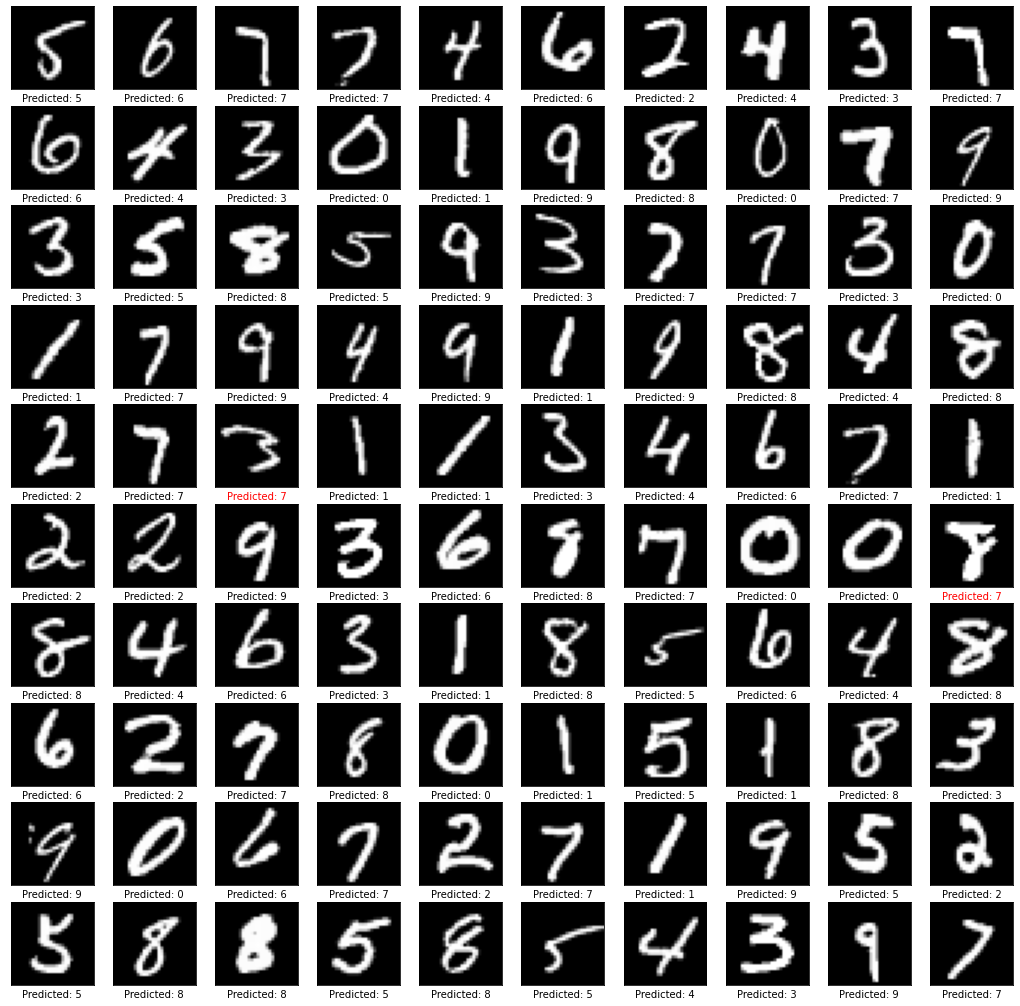

In [22]:
import random

def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

predictions = model.predict(x_test)

prediction_digits = np.argmax(predictions, axis=1)

#plot 100 random test images and their predicted labels.
plt.figure(figsize=(18, 18))
for i in range(100):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_index = random.randint(0, len(prediction_digits))
  plt.imshow(x_test[image_index], cmap=plt.cm.gray)
  ax.xaxis.label.set_color(get_label_color(prediction_digits[image_index],\
                                           y_test[image_index]))
  plt.xlabel('Predicted: %d' % prediction_digits[image_index])
plt.show()

### Convert Model to TFLite

In [23]:
converter = tensorflow.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpuaj706tc/assets


Save the quantized model to file to the Downloads directory

In [25]:
f = open('mnist_model.tflite', "wb")
f.write(tflite_model)
f.close()

Download classification model

In [29]:
from google.colab import files
files.download('mnist_model.tflite')
print('mnist_model.tflite has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

mnist_model.tflite has been downloaded
